In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# Load dataset
tp_pred = pd.read_csv("csvfiles/CTM_topics_predictions.csv").iloc[:,1:] # Topic prediction result 
COVID_1year = pd.read_csv("csvfiles/COVID_1year_CNN_FOX.csv") # Posts data

In [3]:
# Select top 3000 records 
COVID_1year['index']=range(len(COVID_1year))
COVID_1year = COVID_1year[['index','Page Name','Message','Created',"Love", "Wow", "Haha", "Sad", "Angry", "Care", "Link"]].iloc[:3000,:]

In [4]:
# Assign topic labeling based on topic prediction
tp_pred_array = np.array(tp_pred.iloc[:,:-2])
pred_label = np.argmax(tp_pred_array, axis=1)
tp_pred = tp_pred.assign(pred_label=pred_label)

In [5]:
df = pd.merge(COVID_1year, tp_pred[['index','pred_label']], how='left', on=['index'])

In [6]:
df['Created'] = df['Created'].str[:-4]
df['Created'] = pd.to_datetime(df['Created'], format="%Y-%m-%d %H:%M:%S")
df['Month'] = df['Created'].apply(lambda x: "%d" % x.month).astype(int)
df['Date'] = df['Created'].apply(lambda x: "%d" % x.day).astype(int)

In [7]:
# df.to_csv("../csvfiles/COVID_1year_topic_labeled.csv")

Text(0, 0.5, 'Posts count')

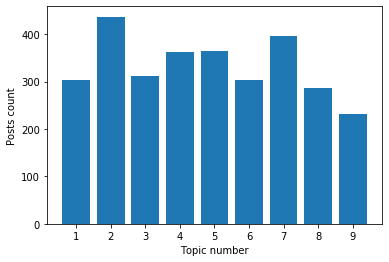

In [8]:
# See topic distribution
topic_count = df[['index','pred_label']].groupby('pred_label').count().reset_index()
plt.bar(topic_count['pred_label']+1, topic_count['index'])
plt.xticks(range(1,10))
plt.xlabel("Topic number")
plt.ylabel("Posts count")

In [9]:
# Select necesary columns
df2= df[['Created','pred_label','Month']]

In [10]:
# Count post number by topic and month
topic_timeseries=df2.groupby(['pred_label','Month']).count().reset_index()

In [11]:
topic_timeseries

,pred_label,Month,Created
0,0.0,3,21
1,0.0,4,26
2,0.0,5,45
3,0.0,6,24
4,0.0,7,24
...,...,...,...
89,8.0,8,37
90,8.0,9,25
91,8.0,10,16
92,8.0,11,28


In [12]:
# Make a table that describes topic distribution over months
ts_table = pd.DataFrame()
ts_table['Month'] = range(1,13)

In [13]:
for topiclabel in range(1,11):
    one_topic_table = topic_timeseries[topic_timeseries['pred_label']==topiclabel][['Created','Month']]
    ts_table = pd.merge(ts_table, one_topic_table, how='left', on=['Month'])

In [14]:
ts_table.columns = ["Month","1","2","3","4","5","6","7","8","9","10"]

In [15]:
ts_table = ts_table.fillna(0)
ts_table

,Month,1,2,3,4,5,6,7,8,9,10
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0
2,3,40.0,20.0,11.0,19.0,4.0,14.0,11.0,7.0,0.0,0.0
3,4,83.0,57.0,17.0,62.0,19.0,60.0,18.0,16.0,0.0,0.0
4,5,62.0,48.0,12.0,53.0,26.0,63.0,36.0,25.0,0.0,0.0
5,6,27.0,23.0,13.0,21.0,13.0,25.0,38.0,13.0,0.0,0.0
6,7,48.0,24.0,17.0,55.0,25.0,52.0,53.0,37.0,0.0,0.0
7,8,24.0,23.0,16.0,35.0,24.0,41.0,34.0,37.0,0.0,0.0
8,9,26.0,30.0,36.0,21.0,19.0,38.0,22.0,25.0,0.0,0.0
9,10,33.0,14.0,176.0,30.0,26.0,41.0,28.0,16.0,0.0,0.0


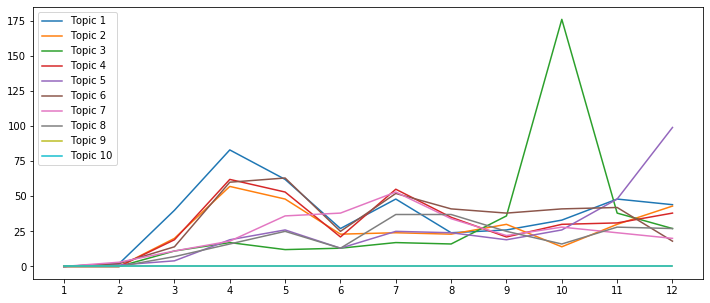

In [16]:
# Plot topic trends over months
plt.figure(figsize=(12,5))
for i in range(1,11):
    plt.plot(range(1,13),ts_table[str(i)],label=("Topic "+str(i)))
plt.xticks(range(1,13))
plt.legend()

In [17]:
df2= df[['Created','pred_label','Month',"Date"]]

In [18]:
topic_timeseries_daily=df2.groupby(['pred_label','Month','Date']).count().reset_index()

In [19]:
# To analyze specific month case, make another table
target_month=10
topic_timeseries_one_month = topic_timeseries_daily[topic_timeseries_daily['Month']==target_month]
topic_timeseries_one_month

,pred_label,Month,Date,Created
107,0.0,10,5,3
108,0.0,10,6,1
109,0.0,10,7,1
110,0.0,10,8,2
111,0.0,10,9,2
...,...,...,...,...
1544,8.0,10,18,1
1545,8.0,10,19,2
1546,8.0,10,20,2
1547,8.0,10,24,1


In [20]:
ts_table = pd.DataFrame()
ts_table['Date'] = range(1,np.max(topic_timeseries_one_month['Date'])+1)
for topiclabel in range(1,11):
    one_topic_table = topic_timeseries_one_month[(topic_timeseries_one_month['pred_label']==topiclabel)
                                                & (topic_timeseries_one_month['Month']==target_month)][['Created','Date']]
    ts_table = pd.merge(ts_table, one_topic_table, how='left', on=['Date'])
    

In [21]:
date_list=list(["Date"])
date_list.extend(list(range(1,11)))
date_list = list(map(str, date_list))

In [22]:
# Table that describes topic distribution by dates in the specific month
ts_table.columns = date_list
ts_table = ts_table.fillna(0)
ts_table

,Date,1,2,3,4,5,6,7,8,9,10
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,28.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
2,3,3.0,0.0,43.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,0.0,0.0,22.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,5,1.0,1.0,15.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
5,6,1.0,0.0,16.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0
6,7,2.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
7,8,1.0,1.0,6.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0
8,9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
9,10,1.0,2.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


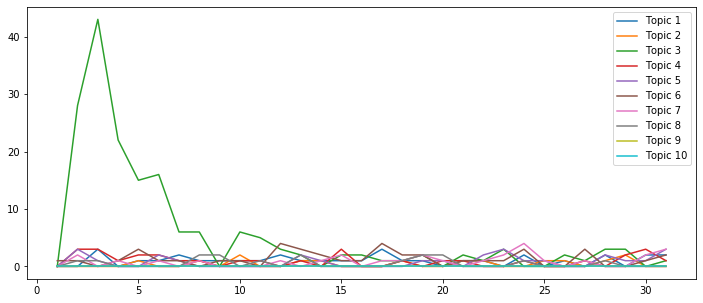

In [23]:
# Time-series topic distribution in the month
plt.figure(figsize=(12,5))
for i in range(1,11):
    plt.plot(range(1,np.max(topic_timeseries_one_month['Date']+1)),ts_table[str(i)],label=("Topic "+str(i)))
plt.legend()

In [24]:
# Then, analyze the top three posts' messaages for a given topic
Topic_number = 4
# Watch out!! 'Pred_label' = Topic -1
specific_date_topic = df[(df['Month']==target_month)&(df['Date']==3) & (df['pred_label']==Topic_number)] 

In [25]:
Topic_number

4

In [26]:
specific_date_topic['Message'].iloc[0]

'Republican Sen. Ron Johnson of Wisconsin has tested positive for coronavirus after being exposed to someone with the virus earlier this week, according to his communications director, making him the third GOP senator to test positive in 24 hours.'

In [27]:
specific_date_topic['Message'].iloc[1]

'JUST IN: North Carolina Republican Sen. Thom Tillis, who is running for reelection, has tested positive for COVID-19.'

In [28]:
specific_date_topic['Message'].iloc[2]

'JUST IN: Sen. Ron Johnson has tested positive for COVID-19, his office announced Saturday -- making him the third senator to test positive in recent days.'

In [29]:
# Let's analyze sentiment distribution.
# First, see dominant sentiments by topic
emotions = ['Love',"Wow","Haha","Sad","Angry","Care"]
cnt=0
for temp_topic_number in range(1,11):
    topic_select = df[df['pred_label']==temp_topic_number-1] # Watch out!! 'Pred_label' = Topic -1
    emotion_table = topic_select[emotions].sum()
    print("Topic Number",temp_topic_number,":", emotions[np.argmax(emotion_table)])

Topic Number 1 : Angry
Topic Number 2 : Sad
Topic Number 3 : Sad
Topic Number 4 : Haha
Topic Number 5 : Sad
Topic Number 6 : Love
Topic Number 7 : Sad
Topic Number 8 : Angry
Topic Number 9 : Sad
Topic Number 10 : Love


In [30]:
# let's analyze the sentiment distribution for a specific topic
Topic_number = 4

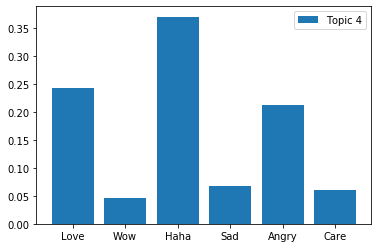

In [31]:
emotions = ['Love',"Wow","Haha","Sad","Angry","Care"]
# for Topic_number in [Topic_number]:
topic_select = df[df['pred_label']==Topic_number-1] # Watch out!! 'Pred_label' = Topic -1
emotion_table = topic_select[emotions].sum()
plt.bar(emotions, emotion_table/np.sum(emotion_table), label="Topic "+str(Topic_number))
plt.legend()

<BarContainer object of 6 artists>

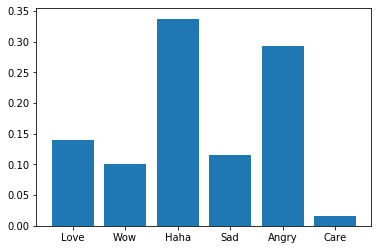

In [32]:
CNN_Topic_count = topic_select[(topic_select['Page Name']=='CNN') & (topic_select['pred_label']==Topic_number-1)][emotions].sum()
plt.bar(emotions, CNN_Topic_count/sum(CNN_Topic_count))

<BarContainer object of 6 artists>

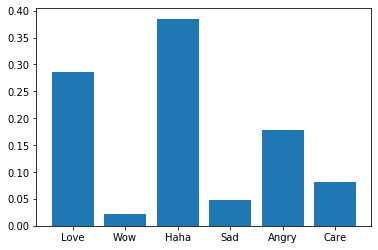

In [33]:
Fox_Topic_count = topic_select[(topic_select['Page Name']=='Fox News') & (topic_select['pred_label']==Topic_number-1)][emotions].sum()
plt.bar(emotions, Fox_Topic_count/sum(Fox_Topic_count))

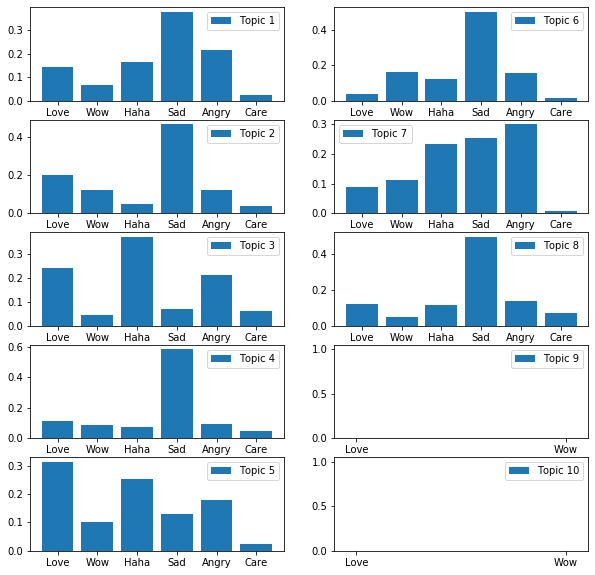

In [34]:
# Sentiment disttribution over all topics
import math
fig, axs = plt.subplots(5,2, figsize=(10,10))

emotions = ['Love',"Wow","Haha","Sad","Angry","Care"]
cnt=0
for Topic_number in range(1,11):
    topic_select = df[df['pred_label']==Topic_number] # Watch out!! 'Pred_label' = Topic -1
    emotion_table = topic_select[emotions].sum()
    axs[cnt%5,math.floor(cnt/5)].bar(emotions, emotion_table/np.sum(emotion_table), label="Topic "+str(Topic_number))
    axs[cnt%5,math.floor(cnt/5)].legend()
    cnt=cnt+1